## Black Scholes

There are two types of options, american and european. American options can be executed at anytime where european options can just be executed on exercise date. Black Scholes assumes european option, but it can be used for american options that don't pay dividends. Black Scholes states that the price of a call option depends on the cumulative normal distribution N of a function of the stock's price S, the present value of a risk-free bond trading at a value K which equals the strike price, the volatility of the stock's annualised returns and the time from today to the exercise date divided by the number of days in a financial year T.


$$C=N(d_1)S-N(d_2)$$

$$d_1=\frac{ln[S/PV(K)]}{\sigma\sqrt(T)}+\sigma \frac{\sqrt(T)}{2}$$

$$d_2=d_1-\sigma \sqrt(T)$$

### Get data

In [110]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from math import sqrt
import numpy as np
from scipy.stats import norm
import seaborn as sns, numpy as np

In [29]:
cached_data={}
def stock_hist(symbol, start=None, end=None, cached_data=cached_data):
    if not symbol in cached_data:
        cached_data[symbol]=yf.download(symbol)
        print(F'Loaded {symbol} num values = {len(cached_data[symbol])}')
    return cached_data[symbol]

In [61]:
#tickers=['TSLA']
N = len(tickers)
historical = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in tickers), axis=1).dropna(axis=0)

In [62]:
historical

,Adj Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2020-12-14,639.830017
2020-12-15,633.250000
2020-12-16,622.770020


In [63]:
historical = historical.dropna()
#Calculate return
historical = historical.assign(adjCloseDayBefore = historical['Adj Close'].shift(1))
historical['returns']=((historical['Adj Close']-historical['adjCloseDayBefore'])/historical['adjCloseDayBefore'])

In [31]:
tsla = yf.Ticker("tsla")

In [32]:
tsla_option = tsla.option_chain(tsla.options[0])

In [33]:
tsla_option.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA201224C00020000,2020-12-18 20:39:31,20.0,618.79,0.05,0.00,12.849976,2.120668,12.0,7,0.000010,True,REGULAR,USD
1,TSLA201224C00040000,2020-12-10 16:33:24,40.0,579.95,0.00,0.00,0.000000,0.000000,2.0,4,0.000010,True,REGULAR,USD
2,TSLA201224C00060000,2020-12-17 20:58:21,60.0,596.25,0.00,0.00,0.000000,0.000000,2.0,4,0.000010,True,REGULAR,USD
3,TSLA201224C00080000,2020-12-17 20:58:21,80.0,576.17,0.00,0.00,0.000000,0.000000,NaN,3,0.000010,True,REGULAR,USD
4,TSLA201224C00100000,2020-12-14 18:54:14,100.0,536.90,0.00,0.00,536.900000,0.000000,NaN,1,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,TSLA201224C01100000,2020-12-18 20:59:39,1100.0,0.51,0.40,0.58,-1.490000,-74.500000,5881.0,2255,1.650392,False,REGULAR,USD
130,TSLA201224C01125000,2020-12-18 20:59:52,1125.0,0.43,0.37,0.43,-1.350000,-75.842690,1983.0,858,1.677736,False,REGULAR,USD
131,TSLA201224C01150000,2020-12-18 20:59:54,1150.0,0.32,0.32,0.33,-1.260000,-79.746830,4957.0,2963,1.701173,False,REGULAR,USD
132,TSLA201224C01155000,2020-12-18 20:58:42,1155.0,0.36,0.25,0.43,-1.150000,-76.158940,3353.0,1274,1.722658,False,REGULAR,USD


In [102]:
timestamp=datetime.timestamp(datetime(2021, 1, 22,1,0,0,0))

In [103]:
# getting call option prices for 24-12-2020
r = pd.read_html(f"https://finance.yahoo.com/quote/TSLA/options?p=TSLA&date={int(timestamp)}")
rCall = r[0]
rPut = r[1]

### Black Scholes Formula

In [54]:
# S is the spot price 
# K is the strike price 
# T is the fraction of days to strike date divided by 252 (stock market days)
# r is the risk free rate
# sigma is the annual volatility of the returns of the stock 

def black_scholes(S, K, T, r, sigma):
    d1 = np.log(S/(K/(1 + r)**T)/(sigma*sqrt(T))) + (sigma*sqrt(T))/2
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - (K/(1 + r)**T) * norm.cdf(d2)

In [104]:
rCall

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.00,242.00,-1.22%,62,191,0.00%
1,TSLA210122C00410000,2020-12-17 12:47PM EST,410.0,243.22,0.0,0.00,243.22,-,-,7,0.00%
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.00,249.38,+6.74%,6,8,0.00%
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.00,249.64,+11.34%,6,18,0.00%
4,TSLA210122C00440000,2020-12-18 6:19PM EST,440.0,174.96,0.0,0.00,174.96,-,-,-,0.00%
...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA210122C00800000,2020-12-18 3:59PM EST,800.0,14.80,14.8,18.00,-16.85,-53.24%,657,441,59.52%
79,TSLA210122C00825000,2020-12-18 3:54PM EST,825.0,15.55,9.8,0.00,15.55,-12.15%,27,17,12.50%
80,TSLA210122C00850000,2020-12-18 3:58PM EST,850.0,11.22,9.8,26.00,11.22,-31.59%,68,70,75.53%
81,TSLA210122C00875000,2020-12-18 3:56PM EST,875.0,9.50,2.0,26.65,9.50,-17.03%,29,23,75.56%


In [107]:
latestSpotPrice = historical['Adj Close'][-1]
# Different Strike prices
numberOfStrikePrices = len(rCall['Strike'])
# define risk free rate
riskFreeRate=0.0069
#Calculate time from today to the exercise date  
today =datetime.now()
diff=(datetime(2020,12,24)-datetime(today.year, today.month, today.day)).days

In [99]:
diff

3

In [69]:
numberOfStrikePrices

134

In [108]:
# Calculate the volatility as the annualized standard deviation of the stock returns
sigma = np.sqrt(252) * historical['returns'].std()

list_estimates = []

# strike prices for call contracts 
for x in range(0,numberOfStrikePrices):
    value_s = black_scholes(S = latestSpotPrice, 
                            K = rCall['Strike'][x], 
                            T = (diff/252), 
                            r = riskFreeRate, 
                            sigma = sigma)
    list_estimates.append(value_s)
    

# merge the two lists to compare results
df_list = pd.DataFrame(data=list_estimates, index=rCall.index)
df_list['estimate_1'] = df_list[0]
del df_list[0]
df_estimate = rCall.merge(df_list, right_index = True, left_index = True)

In [109]:
df_estimate

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate_1
0,TSLA210122C00400000,2020-12-18 3:49PM EST,400.0,242.00,0.0,0.00,242.00,-1.22%,62,191,0.00%,294.959720
1,TSLA210122C00410000,2020-12-17 12:47PM EST,410.0,243.22,0.0,0.00,243.22,-,-,7,0.00%,284.958501
2,TSLA210122C00420000,2020-12-18 3:52PM EST,420.0,249.38,0.0,0.00,249.38,+6.74%,6,8,0.00%,274.957740
3,TSLA210122C00430000,2020-12-18 1:02PM EST,430.0,249.64,0.0,0.00,249.64,+11.34%,6,18,0.00%,264.957501
4,TSLA210122C00440000,2020-12-18 6:19PM EST,440.0,174.96,0.0,0.00,174.96,-,-,-,0.00%,254.957849
...,...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA210122C00800000,2020-12-18 3:59PM EST,800.0,14.80,14.8,18.00,-16.85,-53.24%,657,441,59.52%,-103.958135
79,TSLA210122C00825000,2020-12-18 3:54PM EST,825.0,15.55,9.8,0.00,15.55,-12.15%,27,17,12.50%,-128.748223
80,TSLA210122C00850000,2020-12-18 3:58PM EST,850.0,11.22,9.8,26.00,11.22,-31.59%,68,70,75.53%,-153.512709
81,TSLA210122C00875000,2020-12-18 3:56PM EST,875.0,9.50,2.0,26.65,9.50,-17.03%,29,23,75.56%,-178.250102


In [118]:
# Calculate estimate error and plot result
df_estimate['estimate_error'] = ((df_estimate['Ask'] - df_estimate['estimate_1'])/df_estimate['estimate_1'])*100

df_estimate['estimate_error'].describe()


count       83.000000
mean        96.511097
std       1496.242196
min      -1084.286180
25%       -100.000000
50%       -100.000000
75%          0.264122
max      13451.221624
Name: estimate_error, dtype: float64

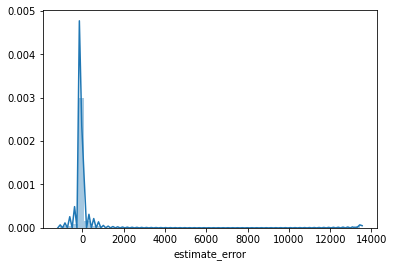

In [119]:
ax = sns.distplot(df_estimate['estimate_error'])

In [122]:
# only include contracts that have been traded at least once today
df1 = df_estimate[(df_estimate.Volume !='-')]

In [123]:
df1 = df_estimate[(df_estimate.Ask >0)]

In [124]:
df1

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate_1,estimate_error
7,TSLA210122C00470000,2020-12-18 1:03PM EST,470.0,213.05,0.00,204.10,48.52,+29.49%,5,29,0.00%,224.963101,-9.274010
11,TSLA210122C00500000,2020-12-18 3:24PM EST,500.0,168.76,0.00,210.00,17.81,+11.80%,19,30,107.04%,194.976193,7.705457
16,TSLA210122C00525000,2020-12-14 11:51AM EST,525.0,133.97,0.00,168.00,12.49,+10.28%,10,7,0.00%,169.994586,-1.173323
23,TSLA210122C00550000,2020-12-18 3:59PM EST,550.0,122.90,0.00,127.85,12.06,+10.88%,21,68,0.00%,145.021130,-11.840433
31,TSLA210122C00572500,2020-12-18 1:04PM EST,572.5,129.20,0.00,132.00,47.45,+58.04%,1,4,63.02%,122.553080,7.708431
32,TSLA210122C00575000,2020-12-18 3:51PM EST,575.0,115.00,0.00,122.10,38.95,+51.22%,39,72,41.01%,120.057146,1.701568
34,TSLA210122C00580000,2020-12-18 3:51PM EST,580.0,114.82,0.00,118.00,12.32,+12.02%,31,142,42.94%,115.065605,2.550193
40,TSLA210122C00595000,2020-12-18 3:29PM EST,595.0,95.52,0.00,145.00,13.67,+16.70%,63,114,111.76%,100.093693,44.864273
42,TSLA210122C00600000,2020-12-18 3:51PM EST,600.0,99.48,0.00,100.00,7.48,+8.13%,102,197,42.19%,95.103996,5.148053
46,TSLA210122C00610000,2020-12-18 3:53PM EST,610.0,95.00,0.00,150.00,8.50,+9.83%,43,141,131.23%,85.126082,76.209214


In [125]:
df1['estimate_error'].describe()

count       35.000000
mean       366.012029
std       2295.654876
min      -1084.286180
25%       -115.943806
50%          7.705457
75%         68.214840
max      13451.221624
Name: estimate_error, dtype: float64